### Random Search Cross Validation in Scikit-Learn

In [77]:
import pandas as pd
import numpy as np

import copy


data = pd.read_csv('Dataset/itu_Estimted_QoE.csv')
display(data.shape)

display(data.head(5))

(2090, 4)

,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu
0,0,1,5,3.119406
1,1,3,5,4.282069
2,2,2,5,4.278156
3,3,3,5,4.278085
4,4,2,5,4.275066


In [61]:
from sklearn.preprocessing import KBinsDiscretizer

X = data['QoE_itu'].values.reshape(-1, 1)
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
#est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
est = est.fit(X)
Xt = est.transform(X)

display(est.bin_edges_[0])
display(est.bin_edges_)

display(Xt)

array([1.54095314, 1.8877958 , 2.18920041, 2.4935248 , 3.42301183,
       4.28206859])

array([array([1.54095314, 1.8877958 , 2.18920041, 2.4935248 , 3.42301183,
       4.28206859])], dtype=object)

array([[3.],
       [4.],
       [4.],
       ...,
       [1.],
       [3.],
       [3.]])

In [62]:
# Increment estimated ITU MOS by 1 because there is the model predicts only 
# Four classes 1, 2, 3, 4
data['itu_QoE_Class'] = Xt + 1
#display(data.head(2))
#display(data.shape)

list1 = [0.49635036, 0.32846715, 0.08029197, 0.07664234, 0.01824818]
display(sum(list1))

0.9999999999999999

In [63]:
# FB 1
mos_feedback = 1
df_user_fb_1 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])
groupby_itu_cl_1 = df_user_fb_1.groupby(['itu_QoE_Class']).count().reset_index()
groupby_itu_cl_1['Frequency %'] = groupby_itu_cl_1['FEEDBACK_VALUE'] / np.sum(groupby_itu_cl_1['FEEDBACK_VALUE'].values)
groupby_itu_cl_1['MoS_Feedback'] = str(1)


display()
display(np.sum(groupby_itu_cl_1['Frequency %'].values))
display(groupby_itu_cl_1['Frequency %'].values)
display(groupby_itu_cl_1)

# FB 2
mos_feedback = 2
df_user_fb_2 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])
groupby_itu_cl_2 = df_user_fb_2.groupby(['itu_QoE_Class']).count().reset_index()
groupby_itu_cl_2['Frequency %'] = groupby_itu_cl_2['FEEDBACK_VALUE'] / np.sum(groupby_itu_cl_2['FEEDBACK_VALUE'])
groupby_itu_cl_2['MoS_Feedback'] = str(2)

display(np.sum(groupby_itu_cl_2['FEEDBACK_VALUE'].values))
display(np.sum(groupby_itu_cl_2['Frequency %'].values))
display(np.sum(groupby_itu_cl_2['Frequency %'].values))
display(groupby_itu_cl_2)
# FB 3
mos_feedback = 3
# groupby_itu_cl_3 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])
df_user_fb_3 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])
groupby_itu_cl_3 = df_user_fb_3.groupby(['itu_QoE_Class']).count().reset_index()
groupby_itu_cl_3['Frequency %'] = groupby_itu_cl_3['FEEDBACK_VALUE'] / np.sum(groupby_itu_cl_3['FEEDBACK_VALUE'])
groupby_itu_cl_3['MoS_Feedback'] = str(3)

display(np.sum(groupby_itu_cl_3['FEEDBACK_VALUE'].values))
display(groupby_itu_cl_3)

# FB 4
mos_feedback = 4
df_user_fb_4 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])
groupby_itu_cl_4 = df_user_fb_4.groupby(['itu_QoE_Class']).count().reset_index()
groupby_itu_cl_4['Frequency %'] = groupby_itu_cl_4['FEEDBACK_VALUE'] / np.sum(groupby_itu_cl_4['FEEDBACK_VALUE'])
groupby_itu_cl_4['MoS_Feedback'] = str(4)

display(np.sum(groupby_itu_cl_4['FEEDBACK_VALUE'].values))
display(groupby_itu_cl_4)

# Q1 = col_qoe_itu.quantile(.25)
# Q3_2 = col_qoe_itu.quantile(.75)
# print('Max: %.5f Min: %.5f Median: %.5f Mean_2: %.5f Q1: %.5f Q3_23: %.5f' %(maximum, minimum, median_2, mean_2, Q1, Q3_2))

# FB 4
mos_feedback = 5
df_user_fb_5 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])
groupby_itu_cl_5 = df_user_fb_5.groupby(['itu_QoE_Class']).count().reset_index()
groupby_itu_cl_5['Frequency %'] = groupby_itu_cl_5['FEEDBACK_VALUE'] / np.sum(groupby_itu_cl_5['FEEDBACK_VALUE'])
groupby_itu_cl_5['MoS_Feedback'] = str(5)

display(np.sum(groupby_itu_cl_5['FEEDBACK_VALUE'].values))
display(groupby_itu_cl_5)

1.0

array([0.45985401, 0.22627737, 0.14963504, 0.09489051, 0.06934307])

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback
0,1.0,126,126,126,126,0.459854,1
1,2.0,62,62,62,62,0.226277,1
2,3.0,41,41,41,41,0.149635,1
3,4.0,26,26,26,26,0.094891,1
4,5.0,19,19,19,19,0.069343,1


161

1.0

1.0

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback
0,1.0,29,29,29,29,0.180124,2
1,2.0,53,53,53,53,0.329193,2
2,3.0,50,50,50,50,0.310559,2
3,4.0,17,17,17,17,0.105590,2
4,5.0,12,12,12,12,0.074534,2


228

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback
0,1.0,44,44,44,44,0.192982,3
1,2.0,52,52,52,52,0.228070,3
2,3.0,62,62,62,62,0.271930,3
3,4.0,46,46,46,46,0.201754,3
4,5.0,24,24,24,24,0.105263,3


817

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback
0,1.0,131,131,131,131,0.160343,4
1,2.0,174,174,174,174,0.212974,4
2,3.0,227,227,227,227,0.277846,4
3,4.0,150,150,150,150,0.183599,4
4,5.0,135,135,135,135,0.165239,4


610

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback
0,1.0,83,83,83,83,0.136066,5
1,2.0,47,47,47,47,0.077049,5
2,3.0,68,68,68,68,0.111475,5
3,4.0,174,174,174,174,0.285246,5
4,5.0,238,238,238,238,0.390164,5


In [64]:
sum1 = np.sum(groupby_itu_cl_1['FEEDBACK_VALUE'].values)
sum2 = np.sum(groupby_itu_cl_2['FEEDBACK_VALUE'].values)
sum3 = np.sum(groupby_itu_cl_3['FEEDBACK_VALUE'].values)
sum4 = np.sum(groupby_itu_cl_4['FEEDBACK_VALUE'].values)
sum5 = np.sum(groupby_itu_cl_5['FEEDBACK_VALUE'].values)

print('sum all: ', sum1 + sum2 + sum3 + sum4 + sum5)

sum all:  2090


### User Feedback 4 and 5

In [65]:
def _convert_class_str(X_target):
    """ Convert string to float
    """
    #return 'MoS_' + str(X_target)
    #'{0:.3g}'.format(num)
    return '{0:.3g}'.format(float(X_target))

display(_convert_class_str(1.0))

'1'

In [66]:
# df_itus = []
# for i in np.arange(1, 6, 1):
#     df_itus.append(pd.DataFrame('groupby_itu_cl_' + str(i)))
    
# print(df_itus)

df_itus = [groupby_itu_cl_1, groupby_itu_cl_2, groupby_itu_cl_3, groupby_itu_cl_4, groupby_itu_cl_5]
# df_itus = [groupby_itu_cl_1, groupby_itu_cl_2, groupby_itu_cl_4]
df_itu_qoe_class = pd.concat(df_itus)

# Convert MoS to string
df_itu_qoe_class['User Feedback MOS'] = df_itu_qoe_class['MoS_Feedback'].apply(lambda x: _convert_class_str(x))
df_itu_qoe_class['Estimated ITU MOS'] = df_itu_qoe_class['itu_QoE_Class'].apply(lambda x: _convert_class_str(x))

# Round Freq to 2 decimals
df_itu_qoe_class['Frequency_Round %'] = np.round(df_itu_qoe_class['Frequency %'], 2)


#display(df_itu_qoe_class.head)
display(df_itu_qoe_class.head(5))

# Pivot DF
# Estmated ITU MOS
#df_MoS_Feedback_IUT_QoE_Class = pd.pivot_table(df_itu_qoe_class, values='Frequency_Round %', columns=['Estimated ITU MOS'], index=['User Feedback MOS'])
df_MoS_Feedback_IUT_QoE_Class = pd.pivot_table(df_itu_qoe_class, values='Frequency_Round %', \
                                               columns=['Estimated ITU MOS'], index=['User Feedback MOS'])


#df_MoS_Feedback_IUT_QoE_Class['5'] = float("{0:.6f}".format(0.0))

display(df_MoS_Feedback_IUT_QoE_Class)

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback,User Feedback MOS,Estimated ITU MOS,Frequency_Round %
0,1.0,126,126,126,126,0.459854,1,1,1,0.46
1,2.0,62,62,62,62,0.226277,1,1,2,0.23
2,3.0,41,41,41,41,0.149635,1,1,3,0.15
3,4.0,26,26,26,26,0.094891,1,1,4,0.09
4,5.0,19,19,19,19,0.069343,1,1,5,0.07


Estimated ITU MOS,1,2,3,4,5
User Feedback MOS,,,,,
1,0.46,0.23,0.15,0.09,0.07
2,0.18,0.33,0.31,0.11,0.07
3,0.19,0.23,0.27,0.20,0.11
4,0.16,0.21,0.28,0.18,0.17
5,0.14,0.08,0.11,0.29,0.39


In [67]:
#df_MoS_Feedback_IUT_QoE_Class.to_csv('Dataset/MoS_Feedback_IUT_QoE_Class_Group4-5.csv')

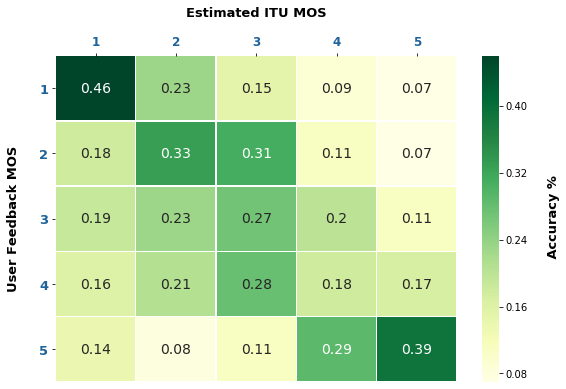

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plot heatmap
plt.figure(figsize=(9,6))
ax = sns.heatmap(df_MoS_Feedback_IUT_QoE_Class, annot=True, \
                 linewidths=.5, cmap='YlGn', annot_kws={"size": 14})
# Set Bar property
ax.figure.axes[-1].set_ylabel('\n Accuracy %', fontsize=13, fontweight='bold')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_size(13)
    item.set_weight("bold")
    item.set_rotation(0)
    item.set_color('#20639B')

# Place the lable on top
ax.xaxis.set_label_position('top')
ax.xaxis.set_label_position('top')

ax.set_xlabel(ax.get_xlabel() + '\n', fontdict=None, labelpad=None, fontsize=13, fontweight='bold')
ax.set_ylabel(ax.get_ylabel() + '\n', fontdict=None, labelpad=None, fontsize=13, fontweight='bold')
# Place the x_tick on the top
ax.xaxis.tick_top()

for item in ax.get_xticklabels():
    item.set_size(12)
    item.set_weight("bold")
    item.set_rotation(0)
    item.set_color('#20639B')

plt.show()

### User Feedback MOS Versus YoutubeAuto MOS.csv

In [70]:
data_mxc = pd.read_csv('Dataset/UserfeedbackMOS_YoutubeAuto_GROUPBY_2.csv')#.dropna()
display(data_mxc.shape)
#data_mxc = data_mxc.reset_index(drop=True, inplace=True)

data_mxc.set_index('USER_FEEDBACK_MOS', inplace=True)

#df_t = data_mxc.T 
    
display(data_mxc.head(5))
#display(df_t.head(5))
#print(data_mxc)

(5, 6)

,1,2,3,4,5
USER_FEEDBACK_MOS,,,,,
1,0.17,0.03,0.56,0,0.24
2,0.05,0.03,0.67,0,0.25
3,0.02,0.00,0.69,0,0.29
4,0.03,0.00,0.60,0,0.37
5,0.02,0.00,0.22,0,0.75


In [71]:
#df_youtube_model = pd.pivot_table(df_itu_qoe_class, values='Frequency_Round %', \
                                               #columns=['Estimated ITU MOS'], index=['User Feedback MOS'])

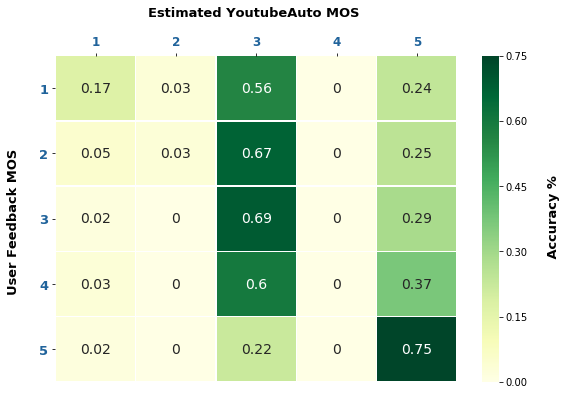

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plot heatmap
plt.figure(figsize=(9,6))
ax = sns.heatmap(data_mxc, annot=True, \
                 linewidths=.5, cmap='YlGn', annot_kws={"size": 14} \
                 , cbar_kws={'label': 'Accuracy %'})

# Set Bar property
ax.figure.axes[-1].set_ylabel('\n Accuracy %', fontsize=13, fontweight='bold')


# Place the lable on top
ax.xaxis.set_label_position('top')
ax.xaxis.set_label_position('top')

ax.set_xlabel('Estimated YoutubeAuto MOS \n', fontdict=None, labelpad=None, fontsize=13, fontweight='bold')
ax.set_ylabel('User Feedback MOS \n', fontdict=None, labelpad=None, fontsize=13, fontweight='bold')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_size(13)
    item.set_weight("bold")
    item.set_rotation(0)
    item.set_color('#20639B')

# Place the x_tick on the top
ax.xaxis.tick_top()
for item in ax.get_xticklabels():
    item.set_size(12)
    item.set_weight("bold")
    item.set_rotation(0)
    item.set_color('#20639B')

plt.show()

### User Feedback MOS Versus YoutubeGeneralP720 MOS.csv

In [75]:
data_mxc_2 = pd.read_csv('Dataset/UserfeedbackMOS_YoutubeGeneralP720.csv')#.dropna()
display(data_mxc_2.shape)
#data_mxc = data_mxc.reset_index(drop=True, inplace=True)

data_mxc_2.set_index('USER_FEEDBACK_MOS', inplace=True)

#df_t = data_mxc.T 
    
display(data_mxc_2.head(5))

(5, 6)

,1,2,3,4,5
USER_FEEDBACK_MOS,,,,,
1,0.71,0.07,0.04,0.10,0.06
2,0.16,0.32,0.23,0.18,0.11
3,0.05,0.02,0.43,0.32,0.18
4,0.07,0.01,0.03,0.72,0.17
5,0.02,0.01,0.01,0.15,0.81


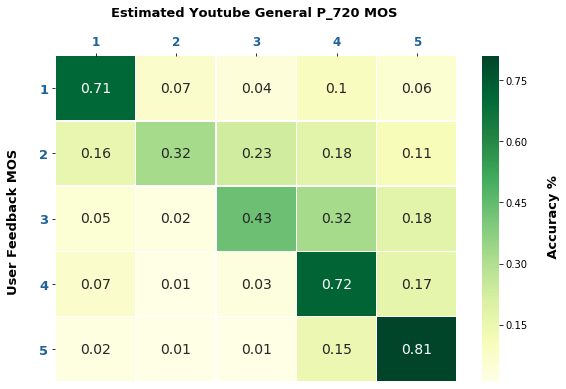

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plot heatmap
plt.figure(figsize=(9,6))
ax = sns.heatmap(data_mxc_2, annot=True, \
                 linewidths=.5, cmap='YlGn', annot_kws={"size": 14} \
                 , cbar_kws={'label': 'Accuracy %'})

# Set Bar property
ax.figure.axes[-1].set_ylabel('\n Accuracy %', fontsize=13, fontweight='bold')


# Place the lable on top
ax.xaxis.set_label_position('top')
ax.xaxis.set_label_position('top')

ax.set_xlabel('Estimated Youtube General P_720 MOS \n', fontdict=None, labelpad=None, fontsize=13, fontweight='bold')
ax.set_ylabel('User Feedback MOS \n', fontdict=None, labelpad=None, fontsize=13, fontweight='bold')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_size(13)
    item.set_weight("bold")
    item.set_rotation(0)
    item.set_color('#20639B')

# Place the x_tick on the top
ax.xaxis.tick_top()
for item in ax.get_xticklabels():
    item.set_size(12)
    item.set_weight("bold")
    item.set_rotation(0)
    item.set_color('#20639B')

